In [1]:
import numpy as np
import keras

Using Theano backend.
Using gpu device 0: GeForce GTX TITAN Black (CNMeM is disabled, cuDNN 5103)
/usr/local/lib/python2.7/dist-packages/theano/sandbox/cuda/__init__.py:599: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


In [2]:
# Import mnist dataset and rescale between [0,1]
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print(X_train.shape)
print(np.max(X_train[0]))
print(y_train[0])

(60000, 28, 28)
1.0
5


In [3]:
from keras.models import Model
from keras.layers import Input, Flatten, Dense

print('Linear model')
images = Input(batch_shape=(None, 28, 28), dtype='float32', name='Images') 
flat = Flatten(name='Flat image')(images)
output = Dense(10, activation='softmax', name='Dense output')(flat)

# Model Architecture defined
model_linear = Model(input=images, output=output)
model_linear.summary()


Linear model
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
Images (InputLayer)              (None, 28, 28)        0                                            
____________________________________________________________________________________________________
Flat image (Flatten)             (None, 784)           0           Images[0][0]                     
____________________________________________________________________________________________________
Dense output (Dense)             (None, 10)            7850        Flat image[0][0]                 
Total params: 7850
____________________________________________________________________________________________________


In [4]:
# Compile model and select optimizer
from keras.optimizers import sgd

sgd_optimizer = sgd(lr=0.01)
model_linear.compile(loss='sparse_categorical_crossentropy', 
                     optimizer=sgd_optimizer, metrics=['accuracy'])


In [5]:
# Train the model
batch_size = 256
nb_epoch = 30

history = model_linear.fit(X_train, y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 0s - loss: 1.6090 - acc: 0.5970 - val_loss: 1.1285 - val_acc: 0.7902
Epoch 2/30
60000/60000 [==============================] - 0s - loss: 0.9692 - acc: 0.8082 - val_loss: 0.8146 - val_acc: 0.8369
Epoch 3/30
60000/60000 [==============================] - 0s - loss: 0.7667 - acc: 0.8362 - val_loss: 0.6818 - val_acc: 0.8527
Epoch 4/30
60000/60000 [==============================] - 0s - loss: 0.6676 - acc: 0.8493 - val_loss: 0.6076 - val_acc: 0.8629
Epoch 5/30
60000/60000 [==============================] - 0s - loss: 0.6075 - acc: 0.8573 - val_loss: 0.5596 - val_acc: 0.8698
Epoch 6/30
60000/60000 [==============================] - 0s - loss: 0.5665 - acc: 0.8632 - val_loss: 0.5253 - val_acc: 0.8751
Epoch 7/30
60000/60000 [==============================] - 0s - loss: 0.5366 - acc: 0.8673 - val_loss: 0.4997 - val_acc: 0.8783
Epoch 8/30
60000/60000 [==============================] - 0s 

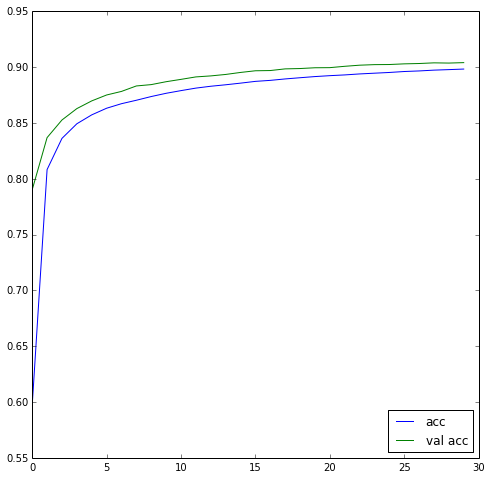

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 8)

plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val acc')
plt.legend(loc='lower right')
plt.show()

In [7]:
## Convolutional model

from keras.models import Model
from keras.layers import Input, Flatten, Dense, Convolution2D, Reshape, MaxPooling2D, Dropout
from keras.optimizers import sgd

print('Linear model')
#images = Input(batch_shape=(None, 28, 28, 1), dtype='float32', name='Images') 
images = Input(batch_shape=(None, 1, 28, 28), dtype='float32', name='Images') 

#First convolution layers stack
conv1 = Convolution2D(20, 5, 5)(images)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

#Second convolution layers stack
conv2 = Convolution2D(50, 5, 5)(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

#Flatten and dense layers
flat = Flatten(name='Flat image')(pool2)
dense1 = Dense(500, activation='relu', name='Dense 1')(flat)

output = Dense(10, activation='softmax', name='Dense output')(dense1)

# Model Architecture defined
model_conv = Model(input=images, output=output)
model_conv.summary()


Linear model
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
Images (InputLayer)              (None, 1, 28, 28)     0                                            
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 20, 24, 24)    520         Images[0][0]                     
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 20, 12, 12)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 50, 8, 8)      25050       maxpooling2d_1[0][0]             
______________________________________________________________________________

In [8]:
# Compile model and select optimizer
sgd_optimizer = sgd(lr=0.01, momentum=0.99, decay=0.005, nesterov=True)
model_conv.compile(loss='sparse_categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])


In [9]:
# Train the model
#X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
#X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

batch_size = 256
nb_epoch = 10
history = model_conv.fit(X_train, y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s - loss: 0.4388 - acc: 0.8842 - val_loss: 0.0972 - val_acc: 0.9707
Epoch 2/30
60000/60000 [==============================] - 2s - loss: 0.0757 - acc: 0.9788 - val_loss: 0.0513 - val_acc: 0.9843
Epoch 3/30
60000/60000 [==============================] - 2s - loss: 0.0361 - acc: 0.9892 - val_loss: 0.0418 - val_acc: 0.9875
Epoch 4/30
60000/60000 [==============================] - 2s - loss: 0.0214 - acc: 0.9936 - val_loss: 0.0372 - val_acc: 0.9888
Epoch 5/30
60000/60000 [==============================] - 2s - loss: 0.0145 - acc: 0.9959 - val_loss: 0.0354 - val_acc: 0.9904
Epoch 6/30
60000/60000 [==============================] - 2s - loss: 0.0099 - acc: 0.9975 - val_loss: 0.0325 - val_acc: 0.9914
Epoch 7/30
60000/60000 [==============================] - 2s - loss: 0.0076 - acc: 0.9983 - val_loss: 0.0341 - val_acc: 0.9904
Epoch 8/30
60000/60000 [==============================] - 2s 

In [10]:
# Score and select prediction with max prob
import numpy as np
pred_test = np.argmax(model_conv.predict(X_test), axis=1)

#Evaluate the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred_test))

[[ 973    0    0    0    0    0    3    1    3    0]
 [   0 1129    2    0    0    0    1    0    3    0]
 [   1    0 1024    0    1    0    1    4    1    0]
 [   0    0    2 1000    0    3    0    3    2    0]
 [   0    0    0    0  970    0    6    1    0    5]
 [   1    0    0    4    0  884    1    1    1    0]
 [   2    2    0    1    3    3  945    0    2    0]
 [   0    2    3    0    0    0    0 1020    1    2]
 [   2    0    2    1    0    3    0    0  964    2]
 [   1    0    0    3    2    2    0    1    1  999]]


('Num errors: ', 92)


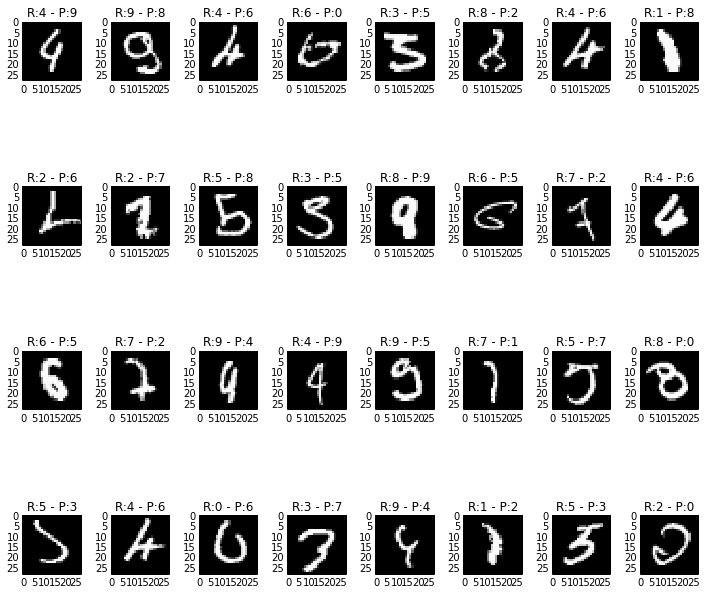

In [16]:
#Plot errors
import matplotlib.pyplot as plt
%matplotlib inline

# set display defaults
plt.rcParams['figure.figsize'] = (10, 10)        # large images
plt.rcParams['image.interpolation'] = 'nearest'  # don't interpolate: show square pixels
plt.rcParams['image.cmap'] = 'gray'              # use grayscale output color heatmap


test_errors=[]
test_errors_real=[]
test_errors_predict=[]

for i in range(len(pred_test)):
    if pred_test[i] != y_test[i]: #Error!
        test_errors += [X_test[i,0,:,:]]
        test_errors_real += [y_test[i]]
        test_errors_predict += [pred_test[i]]  
print("Num errors: ", len(test_errors))


fig = plt.figure()
for n, i in enumerate(range(32)): 
    a = fig.add_subplot(4,8,n+1)
    a.set_title('R:'+str(test_errors_real[i])+' - P:'+str(test_errors_predict[i]))
    fig.tight_layout()
    plt.imshow(test_errors[i])
    